### Theoretical solution of the acoustic field radiated from a disc source in an infinite baffle

In [1]:
import numpy as np
import scipy.special as sp
import matplotlib.pyplot as plt

In [6]:
# medium
sound_speed_air = 343 # [m/s] @20°C
sound_speed_water = 1481 # [m/s] @20°C
air_density = 1.21 # kg/m^3 @20°C
air_impedance = air_density * sound_speed_air # 

# source
frequency = 1.65e6 # [1/s]
wavelength = sound_speed_air/frequency # [m]
source_radius = 0.011 # [m]
wave_number = 2*np.pi/wavelength

# piston far field: r >> pi*a^2 / lambda --> r = 10*pi*a^2/lambda
far_field_transition  = source_radius**2/wavelength
far_field_distance = 3*far_field_transition

print('wavelength = {:.3g}m'.format(wavelength))
print('wave number = {:.3g}'.format(wave_number))
print('far field distance = {:.3g}m'.format(far_field_distance))

wavelength = 0.000208m
wave number = 3.02e+04
far field distance = 1.75m


In [9]:
# Theoretical solution
k = wave_number
z = air_impedance
a = source_radius

theta = np.linspace(-np.pi/2,np.pi/2,100)
r = np.linspace(0.01,1,100)
pressure = np.zeros(shape=(len(theta),len(r)))

constant_factor = 1j*k*z*np.pi*(a**2)
for row in range(len(theta)):
    for col in range(len(r)):
        exponential_factor = np.exp(1j*k*r[col])/2*np.pi*r[col]
        bessel_factor = 2*sp.j0(k*a*np.sin((theta[row])/(k*a*np.sin(theta[row]))))
        pressure[row,col] = constant_factor*exponential_factor*bessel_factor

# theoretical pressure at theta = 0
pressure_theta_0 = np.zeros(shape=(1,len(r)))

for col in range(len(r)):
    exponential_factor = np.exp(1j*k*r[col])/2*np.pi*r[col]
    pressure_theta_0[0,col] = constant_factor*exponential_factor
        
print(pressure[49,99])
print(pressure_theta_0[0,99])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: ComplexWarning: Casting complex values to real discards the imaginary part
  from ipykernel import kernelapp as app


-314.9344720050404
-205.79113353736042


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: ComplexWarning: Casting complex values to real discards the imaginary part


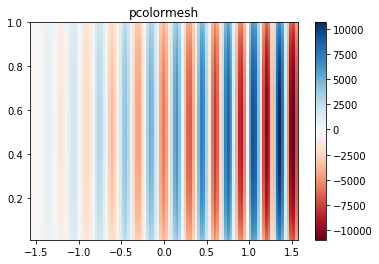

In [10]:
# heatmap plot
fig, ax = plt.subplots()

c = ax.pcolormesh(theta, r, pressure, cmap='RdBu') #, vmin=z_min, vmax=z_max)
ax.set_title('pcolormesh')
# set the limits of the plot to the limits of the data
ax.axis([theta.min(), theta.max(), r.min(), r.max()])
fig.colorbar(c, ax=ax)

plt.show()

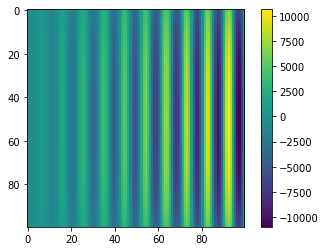

In [11]:
    plt.imshow(pressure, cmap='viridis')
    plt.scatter(, pressure.max())
    plt.colorbar()
    plt.show()

NameError: name 'shape' is not defined